<a href="https://colab.research.google.com/github/macgyver121/DADS6003/blob/main/Week14-kmeans/K_Means_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apply K-means to cluster this data 
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week14-kmeans/Mall_Customers.csv

In [ ]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
nc = 2

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week14-kmeans/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Gender_male'] = np.where(df['Gender'] == 'Male', 1, 0)

In [ ]:
df['Gender_female'] = np.where(df['Gender'] == 'Female', 1, 0)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_male,Gender_female
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [ ]:
df = df.iloc[:,2:7]

In [ ]:
#import pandas as pd
#from sklearn import preprocessing

#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_male,Gender_female
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


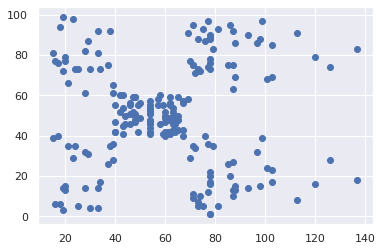

In [ ]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2])

In [ ]:
nc = 6
kmeans = KMeans(n_clusters=nc, random_state=0).fit(df)

In [ ]:
y_kmeans = kmeans.predict(df)

In [ ]:
y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

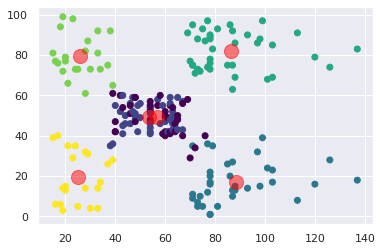

In [ ]:
# get centroid
centers = kmeans.cluster_centers_

plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 2], c='red', s = 200, alpha=0.5);

In [ ]:
range_n_clusters = [2, 3, 4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.29298136996751367
For n_clusters = 3 The average silhouette_score is : 0.38366377184202277
For n_clusters = 4 The average silhouette_score is : 0.4051292479311983
For n_clusters = 5 The average silhouette_score is : 0.443849645338732
For n_clusters = 6 The average silhouette_score is : 0.45176811980591935
For n_clusters = 7 The average silhouette_score is : 0.4391760415655686
For n_clusters = 8 The average silhouette_score is : 0.42561947555340185
For n_clusters = 9 The average silhouette_score is : 0.4077264308766702
For n_clusters = 10 The average silhouette_score is : 0.3824438324500068
